# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\huzmu\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


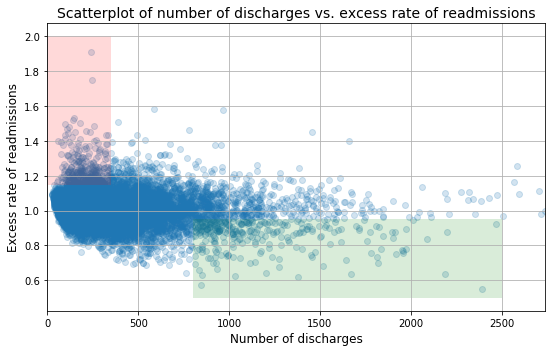

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. Do you agree with the above analysis and recommendations? Why or why not?

I do not entirely agree with the Preliminary report because of missing statistical analysis and the analysis done was based only on the 1 graph above.

The missing data was handled appropriately, by dropping rows with null values.

In the statistical analysis - There is no "Hypothesis test" done and hospital capacity was grouped only into two: number of discharges 1000. The group of 100 <=number of discharges<=1000 was left out. This means the calculated percentages of hospitals with excess readmission rate (63% and 44%) is only for the two groups missing a big chunk of the hospitals in the number of population.

In the statistics part, hospital capacity was divided in two groups which can imply that small hospitals have number of discharges <100. However in the recommendation part, small capacity hospitals was defined as hospitals with number of discharges <300 which is inconsistent and can create confusion.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

## 1.Setup an appropriate hypothesis test.

Ho:There is no significant correlation between hospital capacity(number of discharges) and readmission rates H1: Ho: There is significant correlation between hospital capacity(number of discharges) and readmission rates

In [6]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [7]:
hospital_read_df.shape

(16860, 12)

In [8]:
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [9]:
missing=hospital_read_df[hospital_read_df['Number of Discharges']=='Not Available']
missing.isnull().sum()

Hospital Name                    0
Provider Number                  0
State                            0
Measure Name                     0
Number of Discharges             0
Footnote                      2234
Excess Readmission Ratio      3048
Predicted Readmission Rate    3048
Expected Readmission Rate     3048
Number of Readmissions        5282
Start Date                       0
End Date                         0
dtype: int64

In [32]:
new=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
new.shape

(11578, 12)

In [37]:
new = new[new['Number of Readmissions'].notnull()]

In [38]:
new.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [39]:
new['Number of Discharges']=pd.to_numeric(new['Number of Discharges'])

In [40]:
new.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [41]:
new.head()
new.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [42]:
#Correlation of number of discharges with Excess Readmission rate
r1=-0.097398

In [43]:
r_squared=r1**2
r_squared

0.009486370404

In [45]:
#Total number of hospitals
new.shape[0]

11497

## 2. Compute and report the observed significance value (or p-value).

pearson correlation coefficient, t-statitic & degrees of freedom used in calculating p-value and then compared to alpha=0.05

In [46]:
n1 = new.shape[0]

In [47]:
t1=(r1*((n1-2)/(1-r1**2))**0.5)
t1

-10.492386957113085

In [48]:
df1=n1-2
df1

11495

In [49]:
import scipy.stats as stats
p_value1 = stats.t.sf(np.abs(t1), df1)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value1

1.2224686234119185e-25

pvalue<0.05 so we can reject Ho and accept H1: There is significant correlation between hospital capacity and excess readmission ratio.

Though correlation coefficient for number of discharges and excess readmission rate (-0.097398)- this number is statistically significant

The negative sign of the correlation coefficient means number of discharges and excess readmission rate has a negative correlation, a very small correlation. Meaning as the number of discharges increase there is a very very small increase in the excess readmission ratio.

Looking at the r_squared (pearson correlation coefficient squared) which is <1%, this means only <1% of variability in the exess readmission ratio can be explained by number of discharges.

## 3. Report statistical significance for  α  = .01.

The statistical significance for $\alpha$=.01 will be the same as when $\alpha$=.05 because p_value will be calculated the same way and assumed $\alpha$ will not be part of p_value calculation.

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance means that difference in groups is not likely due to sampling error and this difference (even if very small) is significant when sample size is large. For this sample sample size is 11,497 which is large enough. Practical significance on the other hand is about making sense of what the difference in two groups mean in real life and how it can be applied in practical situation.

Statistical significance and practical significance differ in this scenario where the small correlation (weak relationship) of number of discharges and excess readmission ration is very small but significant. The practical importance is seen using r_squared(Pearson correlation coefficient squared = 0.0095)<1%. This means that only 1% of variability in excess readmission ratio can be explained by number of discharges.

Looking at the data independently from the preliminary report, I divided the dataset into two sets. Set 1(hosp1) are those with excess readmission ration of <=1 and Set2 (hosp2) with excess readmission ratio >1 to see if there is any significant difference between the number of discharges for these two group of hospitals. Calculations are done below.

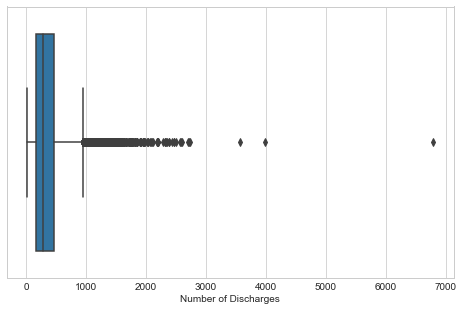

In [78]:
import seaborn as sns
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.boxplot(x=new['Number of Discharges'])

In [55]:
new.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


In [56]:
#Large hospitals with Number of Discharges>1000 are obly 463
bigcap=new[new['Number of Discharges']>1000]
bigcap.shape[0]

463

In [57]:
B1=bigcap[bigcap['Excess Readmission Ratio']>1]
B1.shape[0]

206

In [58]:
B2=bigcap[bigcap['Excess Readmission Ratio']<=1]
B2.shape[0]

257

In [59]:
hosp1=new[new['Excess Readmission Ratio']<=1]
hosp2=new[new['Excess Readmission Ratio']>1]

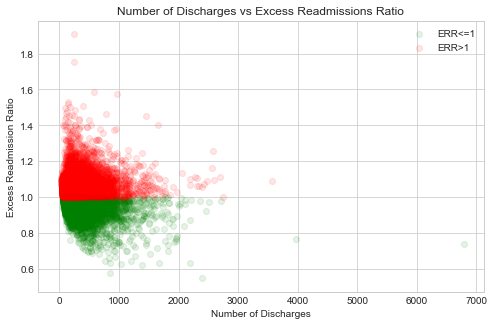

In [79]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

In [61]:
#hosp1
P1=5558/(5558+5939)
P1

0.4834304601200313

In [62]:
#hosp2
P2=5939/(5558+5939)
P2

0.5165695398799687

### Using 'Number of Discharges of two groups ERR > 1 and ERR <= 1

In [63]:
#Difference in mean of # discharges
mean_dis_diff=381.295250-350.652635
mean_dis_diff

30.642615000000035

In [64]:
#standard deviation for difference in mean of # of discharges
std_dis_diff=np.sqrt((322.753963**2/5558) + (294.309313**2/5939))
std_dis_diff

5.772952495085433

In [65]:
##Using 0.05 significance level
moe=1.96*std_dis_diff
moe

11.314986890367448

In [66]:
# confidence interval for difference in number of discharges
ci = mean_dis_diff + np.array([-1, 1]) * moe
ci

array([19.32762811, 41.95760189])

In [67]:
# degrees of freedom
n1=5558
n2=5939
H1=(322.753963**2)/n1
H2=(294.309313**2)/n2

DF=((H1+H2)**2)/(((H1**2)/n1)+((H2**2)/n2))
DF

11217.039092559779

In [68]:
# t_val
t_val=(mean_dis_diff-0)/std_dis_diff
t_val

5.307962437952914

In [69]:
p_value = stats.t.sf(np.abs(t_val), DF)*2  # two-sided pvalue
p_value

1.1297252848786862e-07

### p_value <0.05 and also <0.01 which means I. Ho can be rejected and I. H1 will be accepted

H1: There is significant difference between "number of discharges" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1 There is 95% confidence that this difference in mean of "number discharges" is 19.33 to 42.96. There is 99.95% confidence that this difference in mean of number of discharge is 11.48 to 49.80.

In [71]:
#Using 0.01 significance level: DF, t_val and p_value are the same
moe_2=3.32*std_dis_diff
moe_2

19.16620228368364

In [72]:
# confidence interval for difference in number of discharges 
ci_2 = mean_dis_diff + np.array([-1, 1]) * moe_2
ci_2

array([11.47641272, 49.80881728])

## 5. Look at the scatterplot above.

Advantages: It has clear labels of axis titles and what it is all about

Disadvantages: It is difficult to see the difference or boundary of in the samples that have excess readmission ration <=1 and those>1. It can b represented by different colors. I cannot quickly see the correlation of the two axis. Maybe a trendline will help.

Construct another plot that conveys the same information in a more direct manner.

In [73]:
# Calclating Equation of Trend Line
# I could have used this line in calculating p_value for correlation coefficient but I did the long cut above
from scipy import stats  
x=new['Number of Discharges']
y=new['Excess Readmission Ratio']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [74]:
print(slope, intercept, r_value, p_value, std_err)

-2.90105173305707e-05 1.018106147373357 -0.09739794351079356 1.2225473776733694e-25 2.7649127349110583e-06


In [76]:
X=new['Number of Discharges'].sort_values()
y_trend=(-2.901e-05)*X + 1.02

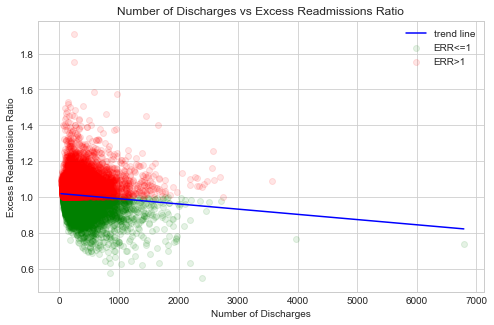

In [80]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.plot(X, y_trend, c='b', label='trend line')

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()